This is a project about Predicting Listing Gains in the Indian IPO Market Using TensorFlow. 
We will be using dataset from website [moneycontrol.com](https://www.moneycontrol.com/ipo/listed-ipos/?classic=true)

In [1]:
#import of libraries for NN, plotting, data formatting etc.
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## Data explanation and loading 


In [2]:
#loading data from file
df = pd.read_csv('Indian_IPO_Market_Data.csv')
#checking first and last 5 rows
print("First 5 rows:")
print(df.head())
print("Last 5 rows: ")
print(df.tail())
#checking the shape of data
print("shape of the data (rows,columns)")
print(df.shape)
#checking information about columns
print("Column names: ")
for col in df.columns:
    print(col)
    
#checking overall sumarize of data and 
print("describtion of the data: ")
print(df.describe())


First 5 rows:
      Date           IPOName  Issue_Size  Subscription_QIB  Subscription_HNI  \
0  03/02/10    Infinite Comp      189.80             48.44            106.02   
1  08/02/10    Jubilant Food      328.70             59.39             51.95   
2  15/02/10    Syncom Health       56.25              0.99             16.60   
3  15/02/10  Vascon Engineer      199.80              1.12              3.65   
4  19/02/10      Thangamayil        0.00              0.52              1.52   

   Subscription_RII  Subscription_Total  Issue_Price  Listing_Gains_Percent  
0             11.08               43.22          165                  11.82  
1              3.79               31.11          145                 -84.21  
2              6.25                5.17           75                  17.13  
3              0.62                1.22          165                 -11.28  
4              2.26                1.12           75                  -5.20  
Last 5 rows: 
        Date           

Data explanation

IPO - Initial Public Offer - refers to the process of offering shares of a private corporation to the public in a new stock issuance.
|column|meaning|
|---|---|
|Date| date when the IPO was listed|
|IPOName| name of the IPO|
|Issue Size|size of the IPO issue, in INR Crores|
|Subscribtion QIB|number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category|
|Subscription HNI|number of times the IPO was subscribed by the HNI (High Networth Individual) investor category|
|Subscribtion RII|number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category|
|Subscribtion Total|total number of times the IPO was subscribed overall|
|Issue Price|the price in INR at which the IPO was issued|
|Listing Gains Percent|is the percentage gain in the listing price over the issue price|

In this project we want to determine if there will be listing gains for the IPO. Listing gains are the percentage increase in the share price of a company from its IPO issue price on the day of listing.

## Data exploration and conversion

In [3]:
#converting Gains percentage to binary value - 1 - when there was profit othervise 0
df['Listing_Gains_Profit'] = np.where(df['Listing_Gains_Percent']>0, 1, 0)
print(df['Listing_Gains_Profit'].describe())
#checking for missing values in any variables 
df.isnull().sum()
# no mising values found 

count    319.000000
mean       0.545455
std        0.498712
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Listing_Gains_Profit, dtype: float64


Date                     0
IPOName                  0
Issue_Size               0
Subscription_QIB         0
Subscription_HNI         0
Subscription_RII         0
Subscription_Total       0
Issue_Price              0
Listing_Gains_Percent    0
Listing_Gains_Profit     0
dtype: int64

We will probably want to use for our predictions all variables except IPOName and Date as we can assume that those have no prediction value 
as our target variable we will take Listings_gain_profit. First we will check whevever the overall IPO lists profit or not.


In [4]:
val=df['Listing_Gains_Profit'].value_counts()
print(val)
percentage_of_profit=val[1]/(val[0]+val[1])
print("Percentage of profiting IPO: ",percentage_of_profit)

Listing_Gains_Profit
1    174
0    145
Name: count, dtype: int64
Percentage of profiting IPO:  0.5454545454545454


We can notice that overall average IPO lists profit as ~54% of IPO is listing profit 

In [5]:
#dropping not neccesary data 
df=df.drop(['Date ', 'IPOName', 'Listing_Gains_Percent'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Issue_Size            319 non-null    float64
 1   Subscription_QIB      319 non-null    float64
 2   Subscription_HNI      319 non-null    float64
 3   Subscription_RII      319 non-null    float64
 4   Subscription_Total    319 non-null    float64
 5   Issue_Price           319 non-null    int64  
 6   Listing_Gains_Profit  319 non-null    int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 16.3 KB


In [6]:
## creating target and predictor variable sets
target = ['Listing_Gains_Profit']
predictors = list(set(list(df.columns)) - set(target))


## Data Visualisation 

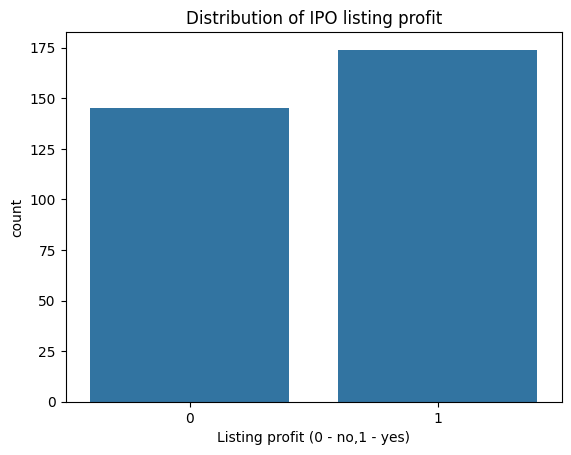

In [7]:
sns.countplot(x='Listing_Gains_Profit',data=df)
plt.xlabel("Listing profit (0 - no,1 - yes)")
plt.title("Distribution of IPO listing profit")
plt.show()

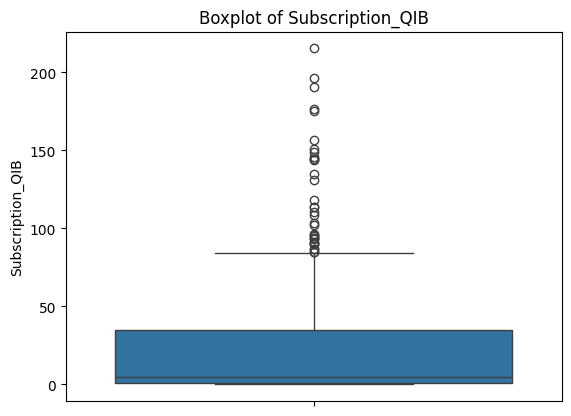

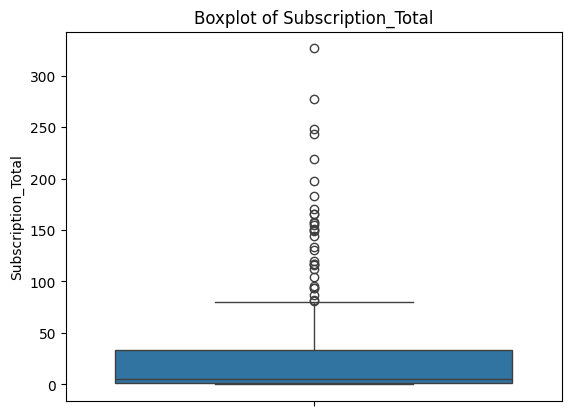

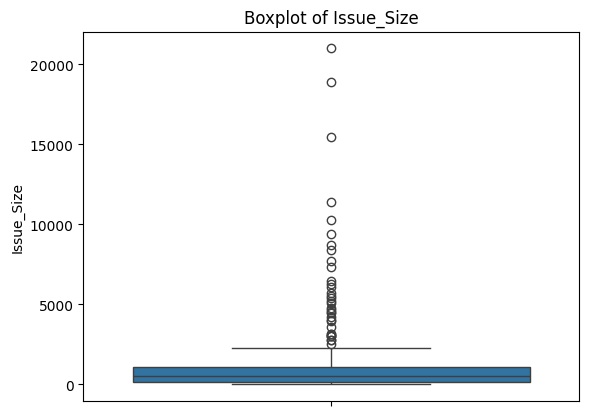

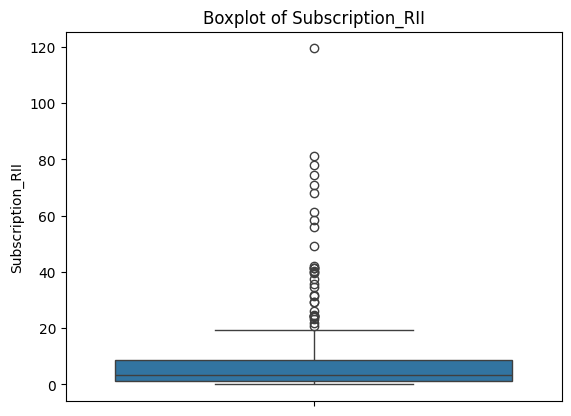

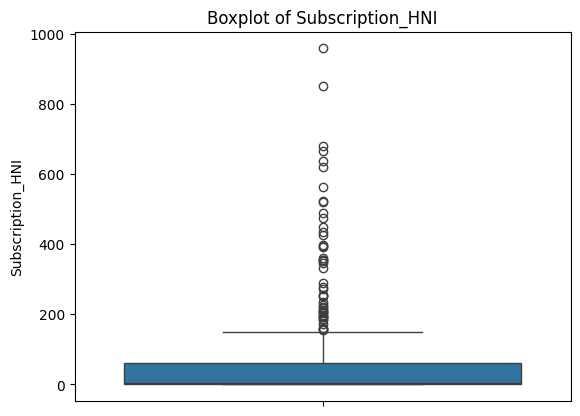

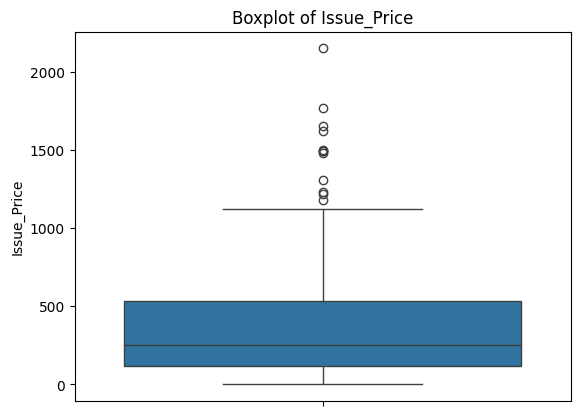

In [8]:
for column in predictors:
    sns.boxplot(data=df, y=column)
    plt.title('Boxplot of '+ column)
    plt.show()

In [9]:
print(df.skew())

Issue_Size              4.853402
Subscription_QIB        2.143705
Subscription_HNI        3.078445
Subscription_RII        3.708274
Subscription_Total      2.911907
Issue_Price             1.696881
Listing_Gains_Profit   -0.183438
dtype: float64


<Axes: xlabel='Subscription_QIB', ylabel='Subscription_HNI'>

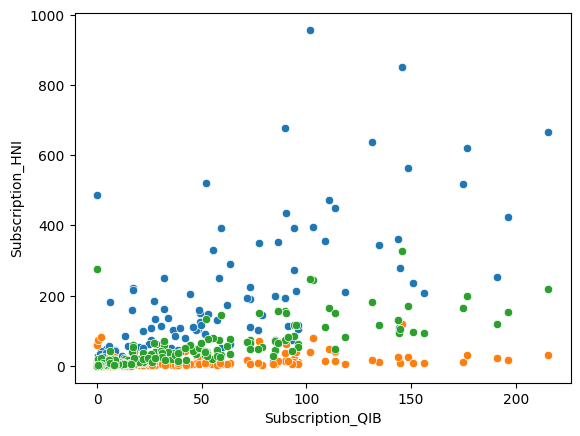

In [10]:
sns.scatterplot(data=df,x='Subscription_QIB',y='Subscription_HNI')
sns.scatterplot(data=df,x='Subscription_QIB',y='Subscription_RII')
sns.scatterplot(data=df,x='Subscription_QIB',y='Subscription_Total')

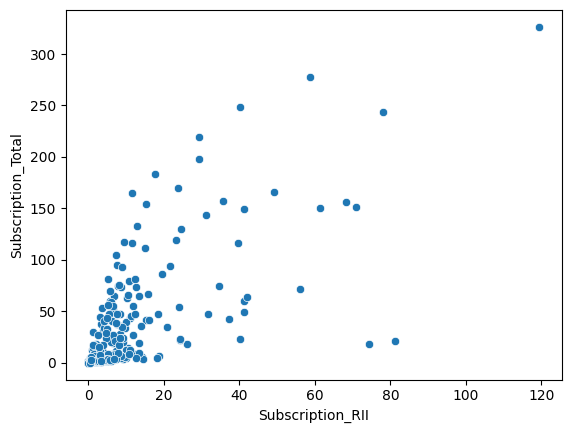

In [11]:
sns.scatterplot(data=df, x='Subscription_RII', y='Subscription_Total')
plt.show()

We can notice from the plots that we have outliers in each of predictor variables. That is later cconfirmed using skew values which are mostly beyond (-1,1) we also found slight corelation between Subscribtion total and Subscription RII

## outlier trearment 
as we saw earlier in our data set there are multiple outlier values we have to take care of. For that we will utilise IQR value 

In [12]:
q1 = df['Issue_Size'].quantile(q=0.25)
q3 = df['Issue_Size'].quantile(q=0.75)  
iqr = q3 - q1   
lower = (q1 - 1.5 * iqr) 
upper = (q3 + 1.5 * iqr)
print(lower,upper)
df['Issue_Size']=df['Issue_Size'].clip(lower,upper)
df['Issue_Size'].describe()

-1227.4875000000002 2496.4925000000003


count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64

In [13]:
def outlier_treatment(colname):
    print("Processing: ",colname)
    q1 = df[colname].quantile(q=0.25)
    q3 = df[colname].quantile(q=0.75)  
    iqr = q3 - q1   
    lower = (q1 - 1.5 * iqr) 
    upper = (q3 + 1.5 * iqr)
    
    print(lower,upper)
    df[colname]=df[colname].clip(lower,upper)
    print(df[colname].describe())
    
    return "Done"

In [14]:
for column in predictors:
    outlier_treatment(column)

Processing:  Subscription_QIB
-49.07750000000001 84.86250000000001
count    319.000000
mean      21.521183
std       29.104549
min        0.000000
25%        1.150000
50%        4.940000
75%       34.635000
max       84.862500
Name: Subscription_QIB, dtype: float64
Processing:  Subscription_Total
-45.97999999999999 81.01999999999998
count    319.000000
mean      20.456646
std       27.217740
min        0.000000
25%        1.645000
50%        4.930000
75%       33.395000
max       81.020000
Name: Subscription_Total, dtype: float64
Processing:  Issue_Size
-1227.4875000000002 2496.4925000000003
count     319.000000
mean      763.561238
std       769.689122
min         0.000000
25%       169.005000
50%       496.250000
75%      1100.000000
max      2496.492500
Name: Issue_Size, dtype: float64
Processing:  Subscription_RII
-9.72 19.6
count    319.000000
mean       6.060940
std        6.176882
min        0.000000
25%        1.275000
50%        3.420000
75%        8.605000
max       19.600000

## normalization of predictor variables 
in order to bring variables to same scale so model will use them equally for learning we need to divide them by their maximum values

In [15]:
df[predictors]=df[predictors]/df[predictors].max()
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.305854,0.253601,0.263157,0.309232,0.252489,0.311793,0.545455
std,0.308308,0.342961,0.374477,0.315147,0.335939,0.268853,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067697,0.013551,0.008184,0.065051,0.020304,0.102454,0.000000
50%,0.198779,0.058212,0.033061,0.174490,0.060849,0.215239,1.000000
75%,0.440618,0.408131,0.404910,0.439031,0.412182,0.461472,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## splitting data into Test and Train sets
We will split data in classic 70/30 proportions (70% for training and 30% for testing)

In [16]:
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=111)
print(X_train.shape);print(X_test.shape)

(223, 6)
(96, 6)


At this point we finished preparing data and datasets for modelling we ended up with data containing 6 independent vartiables (predictors)  and one dependent variable as shown in table bellow:

Predictors :

Issue_Size              
Subscription_QIB        
Subscription_HNI        
Subscription_RII        
Subscription_Total      
Issue_Price     

Target variable:

Listing_Gains_Profit 

|train size|test size|
|---|---|
|233|96|



We have test set containing 233 observations and test set with 96 observations. Now we can proceed to build model and fit it into our data.

## Define the Deep Learning Classification Model
We will build deep model using keras sequential API with 5 hidden layers each containing descending number of nodes and as we dont have negative values we will try RELU activation function. At the end we will add output layer containing one node and sigmoid function as we have binary classification problem

In [17]:
#instantiating a model
model = keras.Sequential()


model.add(keras.layers.Dense(512,input_shape=(X_train.shape[1],),activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(4,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
print(model.summary())



                             
                             
                          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 152473 (595.60 KB)
Trainable params: 15247

For optimizer we will use ADAM as it is a decent choice for binary classification, we will use relatively small learning rate of 0.01 and becouse of that train model with greater number of epochs. As for the loss function and metrics we will use mae (Mean Absolute Error) 

In [18]:
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
loss = 'mae'
metrics = 'mae'

model.compile(optimizer = optimizer, loss = loss, metrics = metrics)


In [19]:
#now we wil fit the model to our data

model.fit( X_train, y_train, epochs = 500)

Epoch 1/500
7/7 [==============================] - 2s 6ms/step - loss: 0.4666 - mae: 0.4666
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 0.3725 - mae: 0.3725
Epoch 3/500
7/7 [==============================] - 0s 3ms/step - loss: 0.3330 - mae: 0.3330
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3397 - mae: 0.3397
Epoch 5/500
7/7 [==============================] - 0s 4ms/step - loss: 0.3033 - mae: 0.3033
Epoch 6/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3092 - mae: 0.3092
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3101 - mae: 0.3101
Epoch 8/500
7/7 [==============================] - 0s 6ms/step - loss: 0.3292 - mae: 0.3292
Epoch 9/500
7/7 [==============================] - 0s 8ms/step - loss: 0.3055 - mae: 0.3055
Epoch 10/500
7/7 [==============================] - 0s 5ms/step - loss: 0.2998 - mae: 0.2998
Epoch 11/500
7/7 [==============================] - 0s 5ms/step - loss: 0.3032 

## model evaluation 

we trained our model on 500 epochs and we could see that our loss function stopeed decreasing after ~50 epochs and we had steady value of 0.3229


In [20]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.3677 - mae: 0.3677
[0.36771300435066223, 0.36771300435066223]
3/3 [==============================] - 0s 8ms/step - loss: 0.5000 - mae: 0.5000
[0.5, 0.5]


In [21]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)


3/3 [==============================] - 0s 0s/step


In [22]:
from sklearn.metrics import r2_score

print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

-0.47159182359568663
-1.1333333333333333


Those are lightly said not satisfying results so we will have to tweak model a bit we will try less layers and nodes as we might overcomplicate first model, we will use same optimizer but with even less learning rate - 0.001, we will also use more appropriate for binary classification loss function - Binary crossentropy, as for metrics we will use accuracy

In [24]:
optimizer2 = keras.optimizers.Adam(learning_rate = 0.001)
loss2 = keras.losses.BinaryCrossentropy()
metrics2 = 'accuracy'
model2.compile(optimizer=optimizer2,loss=loss2,metrics=metrics2)

In [25]:
model2.fit(X_train,y_train,epochs = 300)

Epoch 1/300
7/7 [==============================] - 2s 5ms/step - loss: 0.6897 - accuracy: 0.5471
Epoch 2/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5157
Epoch 3/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6830 - accuracy: 0.5112
Epoch 4/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.5112
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.5112
Epoch 6/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5516
Epoch 7/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6670 - accuracy: 0.5919
Epoch 8/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.6054
Epoch 9/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.6009
Epoch 10/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6188
Epoch 11/300
7/7 [===========

After 300 epochs we can see much better results than last time but we can also see that loss function is dropping so we might train model a bit more 

In [26]:
model2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8296
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.8475
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3544 - accuracy: 0.8430
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8475
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.8520
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.8475
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3410 - accuracy: 0.8520
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3482 - accuracy: 0.8520
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3457 - accuracy: 0.8386
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3433 - accuracy: 0.8430
Epoch 11/100
7/7 [===========

Now as we have more satisfying results we can evaluate our model 

In [27]:
print(model2.evaluate(X_train,y_train))
print(model2.evaluate(X_test,y_test))

7/7 [==============================] - 0s 4ms/step - loss: 0.2869 - accuracy: 0.8700
[0.2868860065937042, 0.8699551820755005]
3/3 [==============================] - 0s 0s/step - loss: 1.1434 - accuracy: 0.6250
[1.1433719396591187, 0.625]


In [28]:
pred_train2=model2.predict(X_train)
pred_test2=model2.predict(X_test)
from sklearn.metrics import r2_score

print(r2_score(y_train,pred_train2))
print(r2_score(y_test,pred_test2))

3/3 [==============================] - 0s 7ms/step
0.6425224697747205
-0.33775752617654753


We can see here that accuracy on train data was much higher (87%) than on test data (62%), so we probably overfitted our second model and we should run it for less epochs, Judging from our R2 scores we have still a lot to accomplish score for training data is much higher than for test data so again we probably overfited our model to test data.